# **BLOCK 1: IMPORTANT LIBRARIES**

In [3]:
# Installing compatible versions
!pip install --upgrade --force-reinstall numpy==1.24.3 pandas==1.5.3 ppscore

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import warnings

# Configure Warnings and Plotting
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='muted')

# **BLOCK 2: Load the Dataset**

In [2]:
# Load dataset (make sure correct CSV is uploaded)
df = pd.read_csv('/content/adult_with_headers.csv')

# Check shape and top rows
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **BLOCK 3: Dataset Overview and Missing Values**

In [3]:
# Structure of the dataset
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Unique values in each column
print("\nUnique Value Count:")
print(df.nunique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing Values:
age               0
workclass         0
fnlwgt            0
ed

# **BLOCK 4: Data Cleaning and Value Checks**

In [25]:
# Step 1: Identify categorical (object) columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Step 2: Show top value counts for each categorical column (helps find dirty values)
print(" Top value counts for each categorical column:")
for col in cat_cols:
    print(f"\n Column: {col}")
    print(df[col].value_counts(dropna=False).head(10))

# Step 3: Replace placeholder/missing indicators with np.nan
missing_values = [' ?', '?', 'unknown', 'Unknown', 'N/A', 'na', 'NA']
df.replace(missing_values, np.nan, inplace=True)

# Step 4: Confirm updated missing value counts
print("\n Missing Values After Cleaning:")
print(df.isnull().sum())


 Top value counts for each categorical column:

 Missing Values After Cleaning:
age                         0
workclass                   0
fnlwgt                      0
education                   0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
native_country              0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
sex_ Male                   0
income_ >50K                0
capital_gain_per_hour       0
has_capital_loss            0
age_bins                    0
capital_interaction         0
dtype: int64


# **BLOCK 5: Standard Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical columns (excluding target)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Optional: Remove target column if it's numeric (e.g., income encoded as 0/1)
if 'income' in num_cols:
    num_cols.remove('income')

# Step 2: Initialize scaler
standard_scaler = StandardScaler()

# Step 3: Fit and transform
df_std_scaled = df.copy()
df_std_scaled[num_cols] = standard_scaler.fit_transform(df_std_scaled[num_cols])

# Step 4: Preview results
print(" Standard Scaled Numerical Columns (first 5 rows):")
print(df_std_scaled[num_cols].head())

# Optional: Check mean ~0 and std ~1
print("\n Mean of scaled features:\n", df_std_scaled[num_cols].mean())
print("\n Std deviation of scaled features:\n", df_std_scaled[num_cols].std())


 Standard Scaled Numerical Columns (first 5 rows):
        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.035572   1.392385 -1.151742  -0.339235       1.142357        0.923310   
1  0.844642   0.993062 -1.037378  -0.339235       1.142357       -0.406252   
2 -0.037979  -0.057285  0.471257   0.178777      -0.422087       -1.735813   
3  1.065297  -0.057285  0.605709  -2.411283      -1.204308       -0.406252   
4 -0.773497  -0.057285  1.186061  -0.339235       1.142357       -0.406252   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0   -1.482891     -0.274890      2.890943     -0.210722  ...        0.245013   
1   -0.789000     -0.899087     -0.294028     -0.210722  ...        0.245013   
2   -0.326406     -0.274890     -0.294028     -0.210722  ...        0.245013   
3   -0.326406     -0.899087     -0.294028     -0.210722  ...        0.245013   
4    0.598782      2.221895     -0.294028     -0.210722  ...       -5.548438   


# **BLOCK 6: Min-Max Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select same numerical columns (used in StandardScaler)
# Reuse 'num_cols' from Block 5

# Step 2: Initialize scaler
minmax_scaler = MinMaxScaler()

# Step 3: Fit and transform
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df_minmax_scaled[num_cols])

# Step 4: Preview results
print(" Min-Max Scaled Numerical Columns (first 5 rows):")
print(df_minmax_scaled[num_cols].head())

# Optional: Check range after scaling
print("\n Min values:\n", df_minmax_scaled[num_cols].min())
print("\n Max values:\n", df_minmax_scaled[num_cols].max())


 Min-Max Scaled Numerical Columns (first 5 rows):
        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370   0.885622  0.384197   0.600000       0.800000        0.666667   
1  0.452055   0.815465  0.399234   0.600000       0.800000        0.333333   
2  0.287671   0.630930  0.597596   0.733333       0.533333        0.000000   
3  0.493151   0.630930  0.615275   0.066667       0.400000        0.333333   
4  0.150685   0.630930  0.691582   0.600000       0.800000        0.333333   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0    0.000000           0.2      0.667492           0.0  ...        0.926829   
1    0.214286           0.0      0.000000           0.0  ...        0.926829   
2    0.357143           0.2      0.000000           0.0  ...        0.926829   
3    0.357143           0.0      0.000000           0.0  ...        0.926829   
4    0.642857           1.0      0.000000           0.0  ...        0.097561   



In [22]:
print("""
MARKDOWN: When to Use StandardScaler vs MinMaxScaler

###  When to Use StandardScaler vs MinMaxScaler

StandardScaler (Z-score normalization):
- Centers the feature values around 0 with unit variance.
- Best suited for algorithms that assume Gaussian distribution:
  - Logistic Regression
  - Linear Regression
  - PCA
  - KNN
- Handles outliers better than MinMaxScaler.

MinMaxScaler (Normalization to range [0, 1]):
- Scales all features to a given range.
- Best suited for:
  - Neural Networks (for faster convergence)
  - Image data
  - Clustering algorithms like K-Means (when features are on different scales)
- Sensitive to outliers — can shrink useful values too much.

Summary: Use StandardScaler when data is normally distributed; use MinMaxScaler when bounded range or faster convergence is needed.
""")



MARKDOWN: When to Use StandardScaler vs MinMaxScaler

###  When to Use StandardScaler vs MinMaxScaler

StandardScaler (Z-score normalization):
- Centers the feature values around 0 with unit variance.
- Best suited for algorithms that assume Gaussian distribution:
  - Logistic Regression
  - Linear Regression
  - PCA
  - KNN
- Handles outliers better than MinMaxScaler.

MinMaxScaler (Normalization to range [0, 1]):
- Scales all features to a given range.
- Best suited for:
  - Neural Networks (for faster convergence)
  - Image data
  - Clustering algorithms like K-Means (when features are on different scales)
- Sensitive to outliers — can shrink useful values too much.

Summary: Use StandardScaler when data is normally distributed; use MinMaxScaler when bounded range or faster convergence is needed.



# **BLOCK 7: Categorization of Categorical Features**

In [28]:
#  Identify all categorical (object) columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

#  Separate columns by number of unique categories
onehot_cols = [col for col in cat_cols if df[col].nunique() <= 5]
label_cols = [col for col in cat_cols if df[col].nunique() > 5]

#  Show what we found
print(f"Total Categorical Columns: {len(cat_cols)}")
print(f"-> One-Hot Encoding Columns (≤5 categories): {onehot_cols}")
print(f"-> Label Encoding Columns (>5 categories): {label_cols}")


Total Categorical Columns: 0
-> One-Hot Encoding Columns (≤5 categories): []
-> Label Encoding Columns (>5 categories): []


# **BLOCK 8: One-Hot Encoding**

In [29]:
from sklearn.preprocessing import OneHotEncoder

#  Backup original shape
original_shape = df.shape

#  One-Hot Encode the selected columns
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

#  Show results
print(f" One-Hot Encoding Complete")
print(f" Shape before encoding: {original_shape}")
print(f" Shape after encoding:  {df.shape}")


 One-Hot Encoding Complete
 Shape before encoding: (32235, 22)
 Shape after encoding:  (32235, 22)


# **BLOCK 9: Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder

#  Initialize encoder
le = LabelEncoder()

#  Apply Label Encoding to each column with >5 categories
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#  Status update
print("Label Encoding Complete")
print(f"Encoded Columns: {label_cols}")

✅ Label Encoding Complete
Encoded Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [30]:
print("""
MARKDOWN: Pros and Cons of One-Hot vs Label Encoding

### One-Hot Encoding vs Label Encoding

One-Hot Encoding:
- Converts categories into multiple binary columns (0/1).
- Pros:
  - No assumption of order between categories.
  - Works well with tree-based and linear models.
- Cons:
  - Increases dimensionality (sparse matrix).
  - Can lead to memory inefficiency with high-cardinality features.

Label Encoding:
- Converts categories into integers (e.g., Red=0, Green=1).
- Pros:
  - Memory efficient (single column).
  - Useful for ordinal features (ordered categories).
- Cons:
  - Introduces ordinal relationship (which may be incorrect for nominal data).
  - Can mislead algorithms that assume numeric relationships (e.g., linear models).


Summary: Use One-Hot for nominal categories (unordered); use Label Encoding for ordinal features or when dimensionality is a concern.
""")



MARKDOWN: Pros and Cons of One-Hot vs Label Encoding

### One-Hot Encoding vs Label Encoding

One-Hot Encoding:
- Converts categories into multiple binary columns (0/1).
- Pros:
  - No assumption of order between categories.
  - Works well with tree-based and linear models.
- Cons:
  - Increases dimensionality (sparse matrix).
  - Can lead to memory inefficiency with high-cardinality features.

Label Encoding:
- Converts categories into integers (e.g., Red=0, Green=1).
- Pros:
  - Memory efficient (single column).
  - Useful for ordinal features (ordered categories).
- Cons:
  - Introduces ordinal relationship (which may be incorrect for nominal data).
  - Can mislead algorithms that assume numeric relationships (e.g., linear models).


Summary: Use One-Hot for nominal categories (unordered); use Label Encoding for ordinal features or when dimensionality is a concern.



# **BLOCK 10: Feature Engineering**

In [31]:
# Feature 1: Capital Gain per Hour (avoids divide-by-zero)
df['capital_gain_per_hour'] = df['capital_gain'] / (df['hours_per_week'] + 1)

# Feature 2: Capital Loss Binary Flag (0/1)
df['has_capital_loss'] = np.where(df['capital_loss'] > 0, 1, 0)

# Feature 3: Age Bins (Categorical interpretation)
df['age_bins'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100],
                        labels=['young', 'middle-aged', 'senior', 'elderly'])

# Feature 4: Capital Gain x Loss Interaction
df['capital_interaction'] = df['capital_gain'] * df['capital_loss']

# Preview new features
print("Feature Engineering Complete — Combined Version")
print(df[['age', 'age_bins', 'capital_gain', 'hours_per_week',
          'capital_gain_per_hour', 'capital_loss', 'has_capital_loss', 'capital_interaction']].head())


Feature Engineering Complete — Combined Version
   age     age_bins  capital_gain  hours_per_week  capital_gain_per_hour  \
0   39  middle-aged      7.684784              40               0.187434   
1   50       senior      0.000000              13               0.000000   
2   38  middle-aged      0.000000              40               0.000000   
3   53       senior      0.000000              40               0.000000   
4   28  middle-aged      0.000000              40               0.000000   

   capital_loss  has_capital_loss  capital_interaction  
0           0.0                 0                  0.0  
1           0.0                 0                  0.0  
2           0.0                 0                  0.0  
3           0.0                 0                  0.0  
4           0.0                 0                  0.0  


# **BLOCK 11: Log Transformation for Skewed Features**

In [32]:
# Step 1: Select numeric columns again (post feature engineering)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Check skewness of numeric columns
skewed = df[numeric_cols].skew().sort_values(ascending=False)
print("Top Skewed Features:\n", skewed.head())

# Step 3: Apply log1p to highly skewed features (skewness > 1)
high_skew_cols = skewed[skewed > 1].index.tolist()

# Avoid columns that can be zero or negative before log1p
safe_log_cols = [col for col in high_skew_cols if (df[col] >= 0).all()]

# Apply np.log1p (log(1+x)) transformation
for col in safe_log_cols:
    df[col] = np.log1p(df[col])

print(f"Log transformation applied on: {safe_log_cols}")


Top Skewed Features:
 capital_gain_per_hour       15.000365
race_ Other                 12.179688
race_ Asian-Pac-Islander     5.609375
capital_loss                 4.540026
has_capital_loss             4.532247
dtype: float64
Log transformation applied on: ['capital_gain_per_hour', 'race_ Other', 'race_ Asian-Pac-Islander', 'capital_loss', 'has_capital_loss', 'capital_gain', 'race_ Black', 'income_ >50K']


# **BLOCK 12: Predictive Power Score Analysis**

In [33]:
# Step 1: Confirm column names
print("Columns Available:")
print(df.columns.tolist())

# Step 2: Use correct target column name
target_col = 'income_ >50K'

# Extra safety check
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found in dataset!")

# Step 3: Compute PPS matrix
pps_matrix = pps.predictors(df, y=target_col)

# Step 4: Sort by predictive strength
pps_matrix = pps_matrix.sort_values(by='ppscore', ascending=False)

# Step 5: Show top predictors
print("Top Predictive Features based on PPS:")
print(pps_matrix[['x', 'ppscore']].head(10))


Columns Available:
['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male', 'income_ >50K', 'capital_gain_per_hour', 'has_capital_loss', 'age_bins', 'capital_interaction']
Top Predictive Features based on PPS:
                           x  ppscore
0                        age        0
11            native_country        0
19                  age_bins        0
18          has_capital_loss        0
17     capital_gain_per_hour        0
16                 sex_ Male        0
15               race_ White        0
14               race_ Other        0
13               race_ Black        0
12  race_ Asian-Pac-Islander        0


# **BLOCK 13: Correlation Matrix and PPS Comparison**

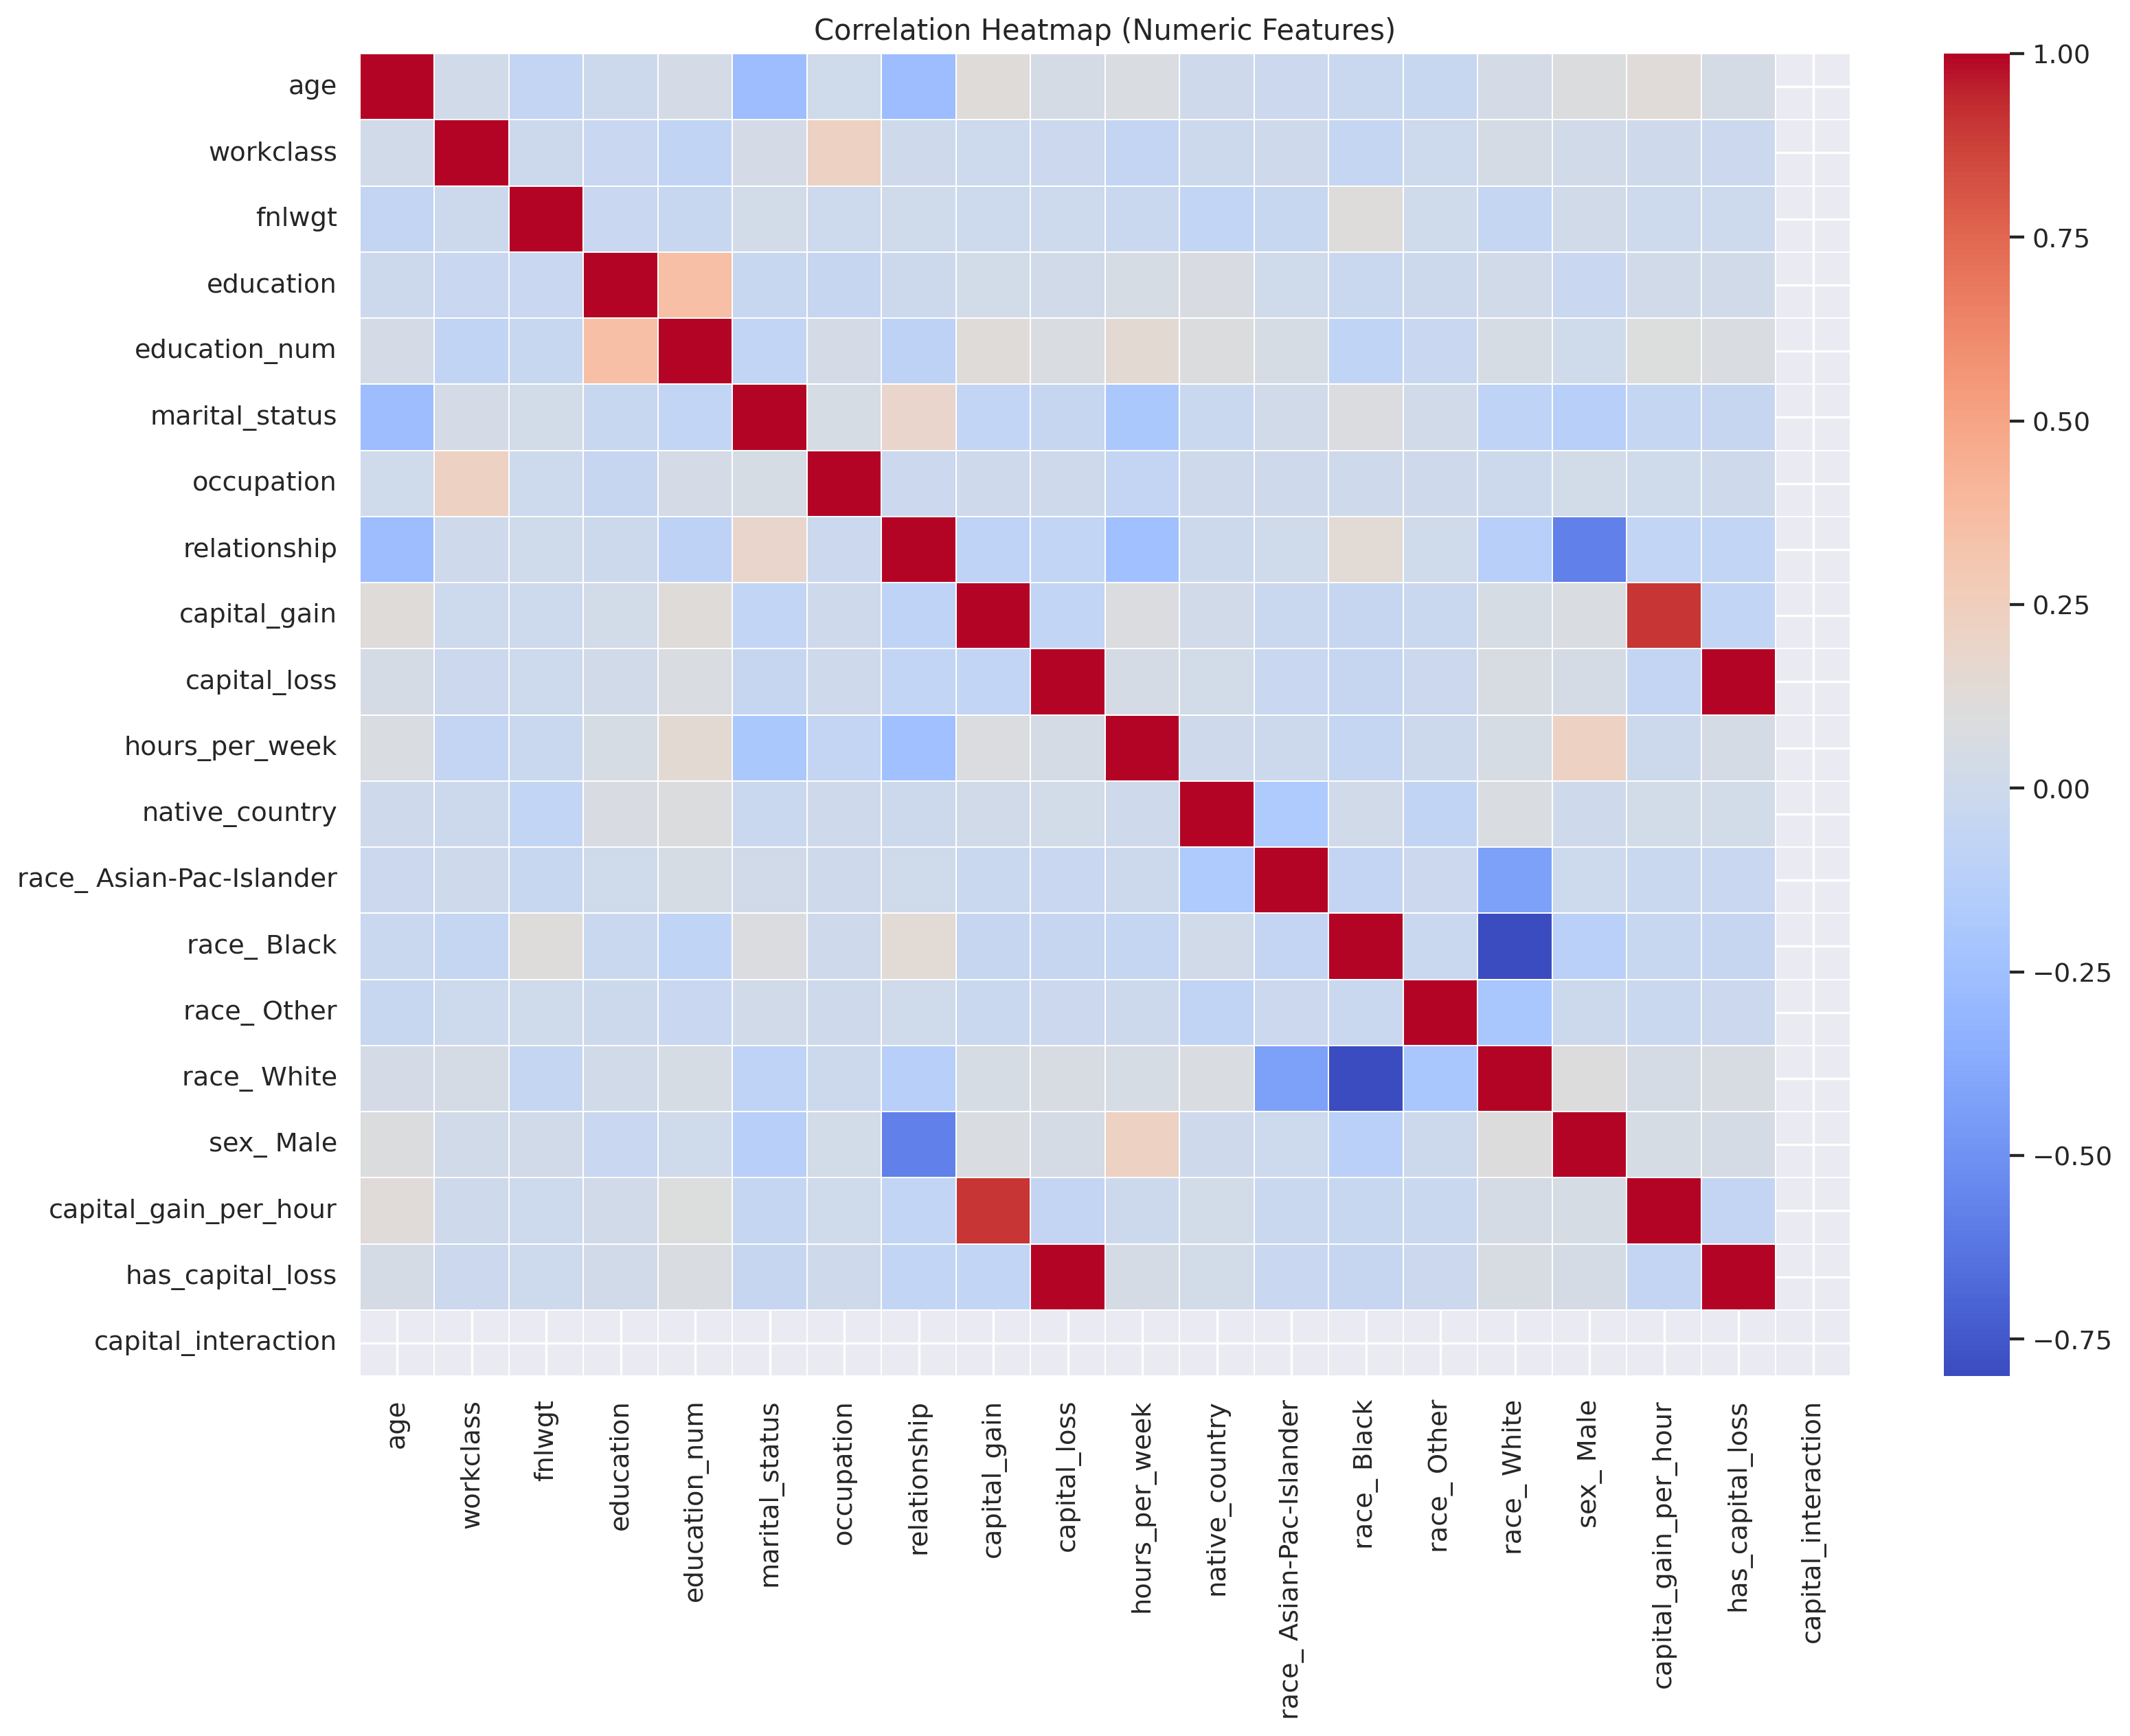


Top PPS Predictors of Target:
                           x  ppscore
0                        age        0
11            native_country        0
19                  age_bins        0
18          has_capital_loss        0
17     capital_gain_per_hour        0
16                 sex_ Male        0
15               race_ White        0
14               race_ Other        0
13               race_ Black        0
12  race_ Asian-Pac-Islander        0


In [34]:
# Step 1: Select only numerical columns (after encoding)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove the target column if present
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Step 2: Compute Correlation Matrix
corr_matrix = df[numeric_cols].corr()

# Step 3: Plot Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Step 4: Display Top PPS Scores from Block 12 (again for comparison)
print("\nTop PPS Predictors of Target:")
print(pps_matrix[['x', 'ppscore']].head(10))


# **BLOCK 14: Outlier Detection using Isolation Forest**

In [35]:
from sklearn.ensemble import IsolationForest

# Select only numeric columns for outlier detection
num_cols = df.select_dtypes(include=np.number).columns

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit and predict
outlier_preds = iso_forest.fit_predict(df[num_cols])

# Add predictions as a new column
df['outlier'] = outlier_preds

# Show counts of inliers (+1) and outliers (-1)
print("Outlier Detection Summary:")
print(df['outlier'].value_counts())

# Keep only inliers (i.e., where outlier == 1)
df = df[df['outlier'] == 1].drop('outlier', axis=1)

# New shape after outlier removal
print(f"Shape after removing outliers: {df.shape}")


Outlier Detection Summary:
 1    31912
-1      323
Name: outlier, dtype: int64
Shape after removing outliers: (31912, 22)


# **BLOCK 15: Final Dataset Review**

In [37]:
# Show final shape
print(f"Final dataset shape: {df.shape}")

# Show data types to confirm encoding/scaling
print("\nFinal Column Data Types:")
print(df.dtypes.value_counts())

# Summary stats of numeric data
print("\nSummary Statistics:")
print(df.describe().T)

# Set correct target column name (after One-Hot Encoding)
target_col = 'income_ >50K'

# Check if target column exists and is binary (for modeling)
if target_col in df.columns:
    print(f"\nTarget column '{target_col}' value counts:")
    print(df[target_col].value_counts())
else:
    print(f"Target column '{target_col}' not found. Double-check your pipeline.")


Final dataset shape: (31912, 22)

Final Column Data Types:
int64       8
float64     7
float16     4
uint8       2
category    1
dtype: int64

Summary Statistics:
                            count       mean        std        min        25%  \
age                       31912.0  38.473396  13.576842  17.000000  28.000000   
workclass                 31912.0   1.408266   0.383625   0.000000   1.386294   
fnlwgt                    31912.0  11.986661   0.628258   9.416216  11.679321   
education                 31912.0  10.312798   3.856753   0.000000   9.000000   
education_num             31912.0  10.076147   2.546653   1.000000   9.000000   
marital_status            31912.0   2.611181   1.503649   0.000000   2.000000   
occupation                31912.0   6.400758   4.318926   0.000000   3.000000   
relationship              31912.0   1.432784   1.596232   0.000000   0.000000   
capital_gain              31912.0   0.180314   0.615663   0.000000   0.000000   
capital_loss              3

# **BLOCK 16: Export Cleaned Dataset**

In [38]:
# Save processed dataset to CSV
df.to_csv('/content/processed_adult_data.csv', index=False)
print("Preprocessed data saved to 'processed_adult_data.csv'")


Preprocessed data saved to 'processed_adult_data.csv'
